<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/reactor_continuo_monod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Biorreactor continuo 

Nombre: Juan manuel G.G

Fecha: 20 de diciembre del 2020

## Antecedentes 

El sistema que se quiere modelar consiste en un biorreactor continuo. En este biorreactor se realizan las siguientes suposiciones.

1. Solo está presente un tipo de microorganismo y son todos iguales

2. El crecimiento del m.o solo depende de un sustrato

3. La mezcla dentro del biorreactor es homogenea

4. La concentración de m.o y sustrato es grande

5. Los parámetros cinéticos se mantiene constantes

Evidentemente, hay más suposiciones implícitas en el modelo. Pero las anteriores suelen ser las más importantes.

## Red del proceso 

En la red se observa los tres procesos que permiten al cambio en las concentraciones de biomasa y sustrato, los cuales son:

1. Crecimiento del microorganismo. Este se ve afectado positivamente por el sustrato. 

2. Flujo de sustrato al biorreactor. Este flujo se presenta con una concentración de sustrato $s_{ent}$, aumentando de esta manera la concentración de sustrato en el biorreactor. 

3. Flujo de biomasa y sustrato hacia afuera del biorreactor. A mayor valor del parámetros $D$, mayor es la velocidad con la que se retira biomasa y sustrato del biorreactor. 

## Balance de masa

$$\frac{dm}{dt} = \dot{m}_{ent} - \dot{m}_{sal}$$ 

Considerando que $m = \rho V$ y $ \dot{m} = F \rho$

$$\frac{d(\rho V)}{dt} = F_{ent} \rho - F_{sal} \rho$$ \

Dado que la densidad es constante y $F_{ent} = F_{sal}$ en un biorreactor continuo 

$$\rho \frac{dV}{dt} = \rho(F_{ent} - F_{sal})$$

$$\frac{dV}{dt} = 0$$

## Balance de especies 

### Balance de sustrato 

$$\frac{dm_{s}}{dt} = \dot{m}_{s,ent} - \dot{m}_{s,sal} - \dot{m}_{s,cons}$$

$$\frac{d(Vs)}{dt} = Fs_{ent} - Fs - r_{s}V$$

$$V \frac{ds}{dt} = F(s_{ent} - s) - r_{s}V$$

$$\frac{ds}{dt} = \frac{F}{V}(s_{ent} - s) - r_{s}$$

$$\frac{ds}{dt} = D(s_{ent} - s) - r_{s}$$


### Balance de biomasa

$$\frac{dm_{x}}{dt} = \dot{m}_{gen} - \dot{m}_{sal}$$

$$\frac{d(Vx)}{dt} = r_{x}V - Fx$$


$$ V \frac{dx}{dt} = r_{x}V - Fx$$

$$\frac{dx}{dt} = r_{x} - Dx$$

## Expresiones cinéticas

Ahora consideramos las expresiones que describen a $r_{x}$ y $r_{s}$

$$r_{x} = \mu \left( \frac{s}{k + s}\right)x $$ 

$$r_{s} = \frac{1}{y} r_{x}$$

## Parámetros

La interpretación y la unidades de los parámetros es la siguiente 

Parámetros de operación

$D$ --> Tasa de dilusión. Representa la el número de veces que un volumen igual al volumen del biorreactor pasa a través de este en una hora. Unidades (1/h)

$s_{ent}$ --> Concentración de sustrato en la entrada. Unidades (g/(L*h))

Parámetros cinéticos

$\mu$ --> Velocidad de crecimiento. Representa la velocidades de crecimiento del microorganismo cuando las condiciones son óptimas, es decir, cuando hay mucho sustrato. Unidades (1/h)

$k$ --> Concentración de sustrato a la cual se alcanza la mitad de la velocidad máxima de crecimiento. Unidades (g/L)

$y$ --> Rendimiento. Es una fracción que representa que tanto del sustrato consumido se transforma en biomasa. Adimeensional



## Análisis de estabilidad 

Describir los puntos de equilibrio, explicar cómo los obtienen, y si esperan/observan bifurcaciones. Incluir código comentado o procedimiento algebraico. 

En las siguiente secciones se describen con detalle los puntos de equilibrio así como su dependencia con respecto a los parámetros del modelo. Sin embargo, aquí se muestran los dos puntos de equilibrio que se encontraron:

$$\frac{ds}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm} D(s_{ent} - s) - r_{s} = 0  \hspace{1cm}  (1)$$
$$\frac{dx}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm}  r_{x} - Dx = 0 \hspace{1cm} (2)$$

Resolviendo la ecuación 1 y 2 para las variables $s$ y $x$, se obtienes los siguientes puntos de equilibrio:



$$P_{1}: \hspace{1cm} \bar{s} = s_{ent}, \hspace{0.25cm} \bar{x} = 0$$ \

$$P_{2}: \hspace{1cm} \bar{s} = \frac{Dk}{\mu - D}, \hspace{0.25cm} \bar{x} = \frac{y(Dk + s_{ent}(D-\mu))}{D-\mu}$$

Puntos de equilibrio obtenidos con Python.

https://github.com/JuanM-GG/Biologia-de-sistemas/blob/main/puntos_de_equilibrio.ipynb

Cargar Grind.R

In [ ]:
install.packages("deSolve")
install.packages("FME")
source("Grind.R")

Cargar librerías

In [ ]:
install.packages("ggplo2")
library(ggplot2)

Establecer modelo

In [11]:
model <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento (Monod)
    rx = mu*s/(k+s)*x

    # balances de especies
    ds = -(1/y)*rx + D*(sin - s)
    dx = rx - D*x

    return(list(c(ds,dx))) 
  })
}

Establecer velor de parámetros 

In [12]:
p <- c(mu = 1.2, k = 180, y = 0.1, D = 0.01, sin = 10)

Condiciones iniciales 

In [13]:
s <- c(s = 10, x = 0.1)

Tiempo de simulación 

In [15]:
time <- seq(0,100)

Función para calcular los puntos de equilibrio 

In [26]:
steady_state <- function(p) {
  with(as.list(p), {

    # Primer punto de equilibrio
    s1 = sin
    x1 = 0
    ss1 = c(s1 = s1, x1 = x1)

    # segundo punto de equilibrio
    s2 = D*k/(mu - D)
    x2 = y*(D*k + sin*(D - mu))/(D - mu)
    ss2 = c(s2 = s2, x2 = x2)

  return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3)))
  })
}

¿Cuáles es el valor de los puntos de equilibrio para el vector de parámetros que hemos establecido?

In [27]:
steady_state(p)

$ss1
s1 x1 
10  0 

$ss2
   s2    x2 
1.513 0.849

Para ver los puntos de equilibrio en un plano de fase, junto con las ceroclinas, usamos la función *plane* y la función *newton*

        s         x 
1.5126018 0.8487398 
Stable point, eigenvalues:  -0.05564356 -0.01 


s         x 
1.5126018 0.8487398

            s             x 
 1.000000e+01 -5.441808e-08 
Unstable point, eigenvalues:  0.0531579 -0.01 


s             x 
 1.000000e+01 -5.441808e-08

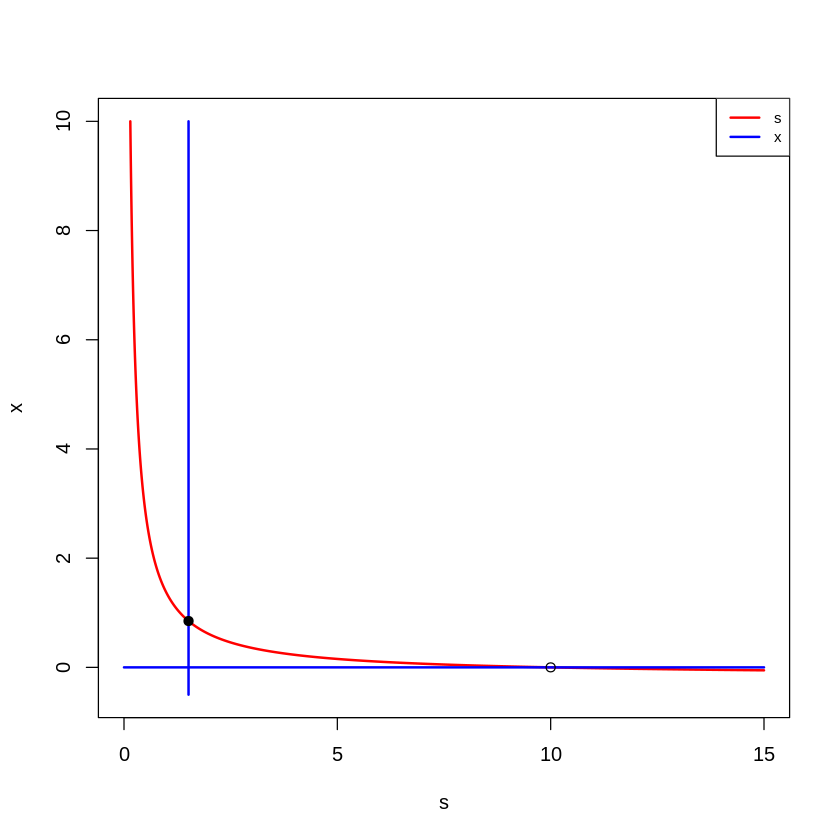

In [16]:
plane(xmin = 0, xmax = 15, ymin = -0.5, ymax = 10)
newton(state = c(s = 0, x = 1), plot = T)
newton(state = c(s = 15, x = -0.5), plot = T)

De acuerdo con la la salida anterior. El punto de equilibrio *ss1* es estable, mientras que el punto de equilibrio *ss2* es inestable.  

### Efecto del parámetro D sobre el punto de equilibrio

        s         x 
1.5126018 0.8487398 
Stable point, eigenvalues:  -0.05564356 -0.01 
            s             x 
 1.000000e+01 -5.441808e-08 
Unstable point, eigenvalues:  0.0531579 -0.01 


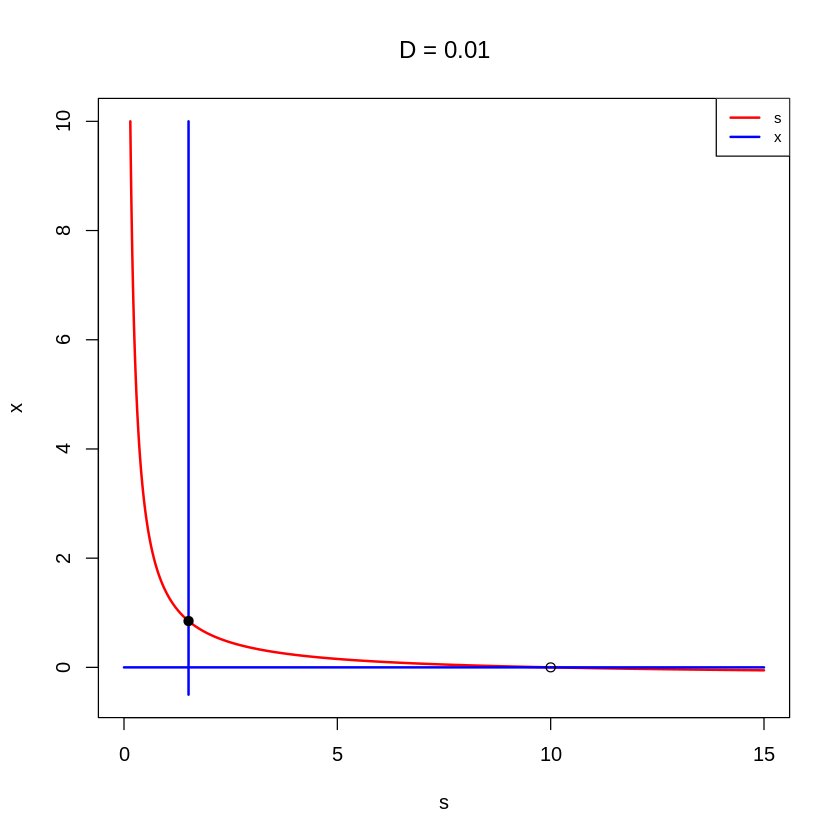

        s         x 
6.2068949 0.3793105 
Stable point, eigenvalues:  -0.04 -0.02362965 
 s  x 
10  0 
Unstable point, eigenvalues:  -0.04 0.02315789 


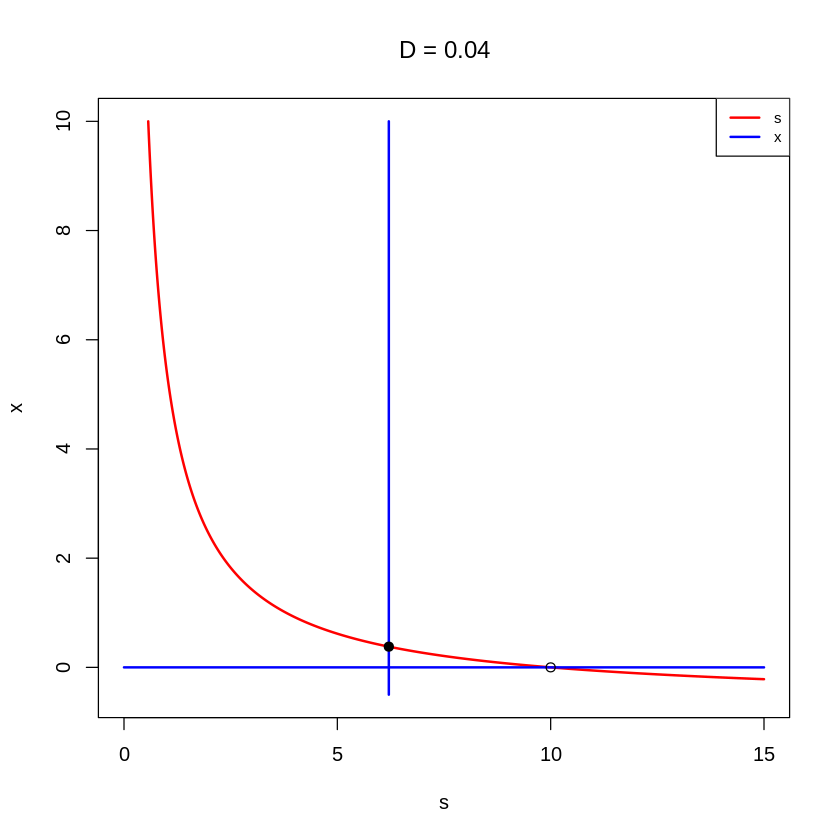

           s            x 
9.999999e+00 7.569379e-08 
Stable point, eigenvalues:  -0.08 -0.01684211 
         s          x 
12.8571458 -0.2857146 
Unstable point, eigenvalues:  -0.08 0.01659263 


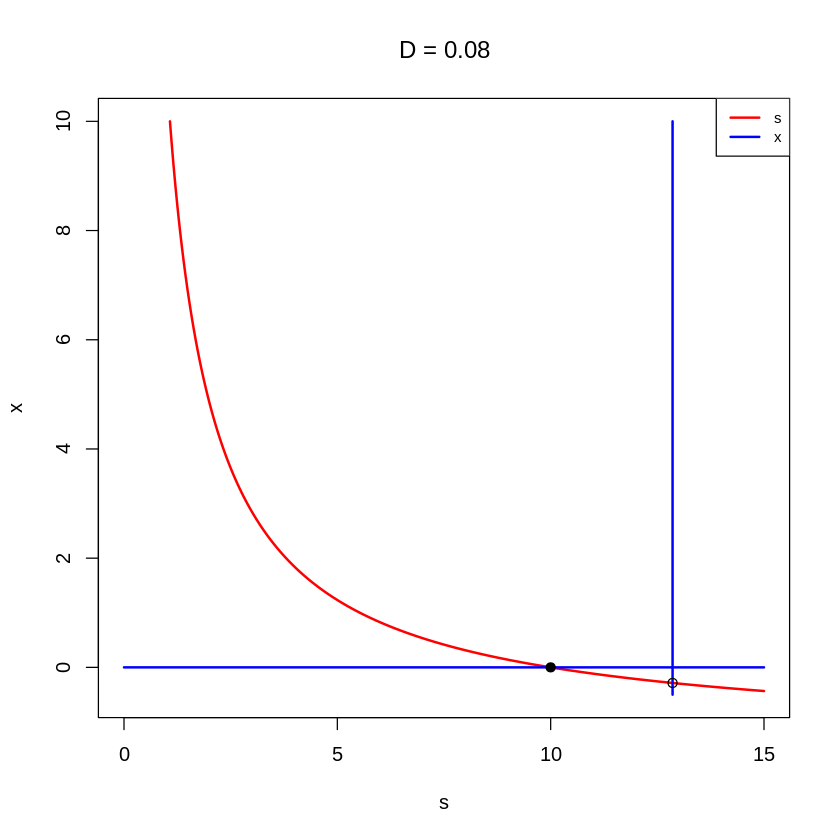

In [29]:
for (D in c(0.01,0.04,0.08)) {

  p["D"] <- D
  plane(xmin = 0, xmax = 15, ymin = -0.5, ymax = 10, main = paste0("D = ", D))
  newton(state = c(s = 0, x = 1), plot = TRUE)
  newton(state = c(s = 15, x = -0.5), plot = TRUE)
}
p["D"] <- 0.01 # Regresar D a su valor original

En la salida anterior vemos que al variar el valor del parámetro $D$ cambia el valor y la estabilidad de los puntos de equilibrio. Por ejemplo, al pasar de $D = 0.01$ a $D = 0.04$, el valor de $\bar{x}$ pasa de 0.8487 a 0.3779 (g/L), mientras que el valor de $\bar{s}$ pasa de 1.512 a 6.206 (g/L). Una primera observación de lo anterior es que el efecto de cambiar $D$ es mayor sobre $\bar{s}$ que sobre $\bar{x}$. Además, como la estabilidad de los puntos de equilibrio cambia, se espera observar bifurcaciones.  

### Diagrama de bifurcación 

        s         x 
1.5126018 0.8487398 
Stable point, eigenvalues:  -0.05564356 -0.01 
 s  x 
10  0 
Unstable point, eigenvalues:  0.05315789 -0.01 
Starting at D = 0.01 with:
        s         x 
1.5126018 0.8487398 
diagonal element is zero 
[1] 2
Bifurcation at D = 0 
Starting at D = 0.01 with:
 s  x 
10  0 
Bifurcation at D = 0.064 


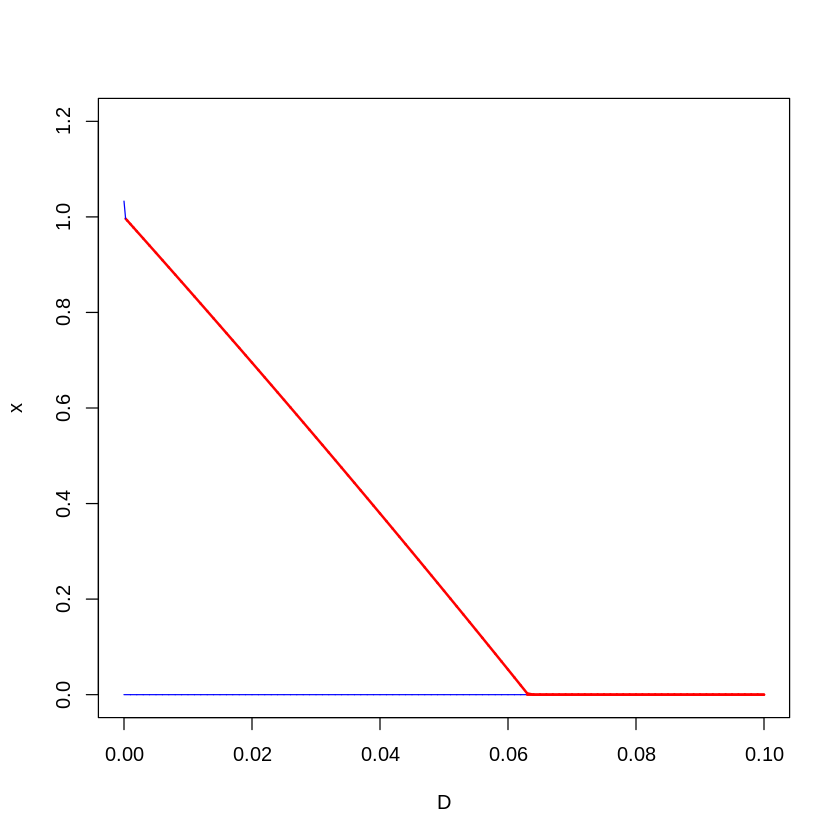

In [34]:
ss1 <- newton(state = c(s = 0, x = 1))
ss2 <- newton(state = c(s = 10, x = 0))

continue(state = ss1, parms = p, odes = model, x = "D", 
         step = 0.01, xmin = 0.0, xmax = 0.1, y = "x", ymin = 0, ymax = 1.2)
continue(state = ss2, parms = p, odes = model, x = "D", 
         step = 0.01, xmin = 0.0, xmax = 0.1, y = "x", ymin = -0.01, ymax = 1.2, add = TRUE)

        s         x 
1.5126018 0.8487398 
Stable point, eigenvalues:  -0.05564356 -0.01 
 s  x 
10  0 
Unstable point, eigenvalues:  0.05315789 -0.01 
Starting at D = 0.01 with:
        s         x 
1.5126018 0.8487398 
diagonal element is zero 
[1] 2
Bifurcation at D = 0 
Starting at D = 0.01 with:
 s  x 
10  0 
Bifurcation at D = 0.064 


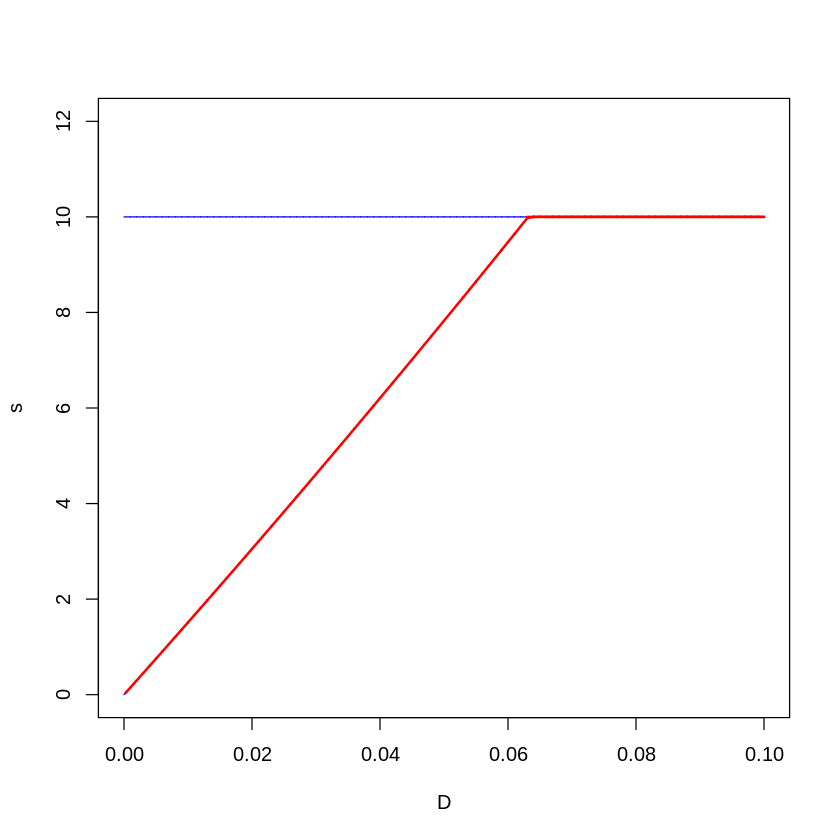

In [35]:
ss1 = newton(state = c(s = 0, x = 1))
ss2 = newton(state = c(s = 10, x = 0))

continue(state = ss1, parms = p, odes = model, x = "D",
         step = 0.01, xmin = 0,xmax = 0.1, y = "s", ymin = 0, ymax = 12)
continue(state = ss2, parms = p, odes = model, x = "D",
         step = 0.01, xmin = 0,xmax = 0.1, y = "s", ymin = -0.01, ymax = 12, add = TRUE)

Del plano de fase y el diagrama de bifurcacion obtenemos las siguientes conclusiones

1. Si Dk/(mu - D) < sin, exiten dos puntos de equilibrio. Siendo ss1 estable y ss2 inestable

2. Cuando Dk/(mu - D) =sin, se prsenta una bifurcación.

3. Si Dk/(mu - D) > sin, exsiten dos puntos de equilibrio. Ahora ss2 es estable y ss1 es inestable y tiene un valor negativo para x. 

Por lo tanto, para que el biorreactor opere en condiciones continuas con una concentración estable de biomasa, es necesario alimentar una concentración de sustrato mayor o igual a Dk/
(mu -D)

## Rendimiento del proceso 

Es importante saber el efecto que tienen los parámetros de operación (en este caso $D$ y $s_{ent}$) sobre el rendimiento del proceso. A contunuación respondemos esta cuestión. 

## Tasas de nacimiendo y drenado para la biomasa

Del punto de equilibrio *ss1* vemos que una condicón para tener un valor positivo de sustrato en el equilibrio es:

$$\mu > D$$

Ya que $$\bar{s} = \frac{Dk}{\mu - D}$$

Esto lo podemos comprender analizando las tasas de nacimiento y de drenado de la biomasa 

Función para calcular tasas de nacimiento y drenado de la biomasa

In [36]:
rates <- function(s, mu, k, D) {

  birth_rate = mu*s/(k + s)

  drain_rate = D

  data = data.frame(s = s, birth_rate = birth_rate, drain_rate = drain_rate)

  return(data)
}

Función para graficar las tasas

In [37]:
plot_rates <- function(data, D) {

  ggplot(data, aes(s)) + 
  geom_line(aes(y = birth_rate, color = "birth rate"), lwd = 2) +
  geom_line(aes(y = drain_rate, color = "drain rate"), lwd = 2, lty = 2) +
  ylab("Rate (1/h)") +
  xlab("Substrate (g/L)") +
  labs(title = paste0("D = ", D)) +
  scale_color_manual("", 
                    breaks = c("birth rate", "drain rate"),
                    values = c("blue", "red")) +
                    theme_bw()
}

In [38]:
s <- seq(0,800)
D <- 0.01

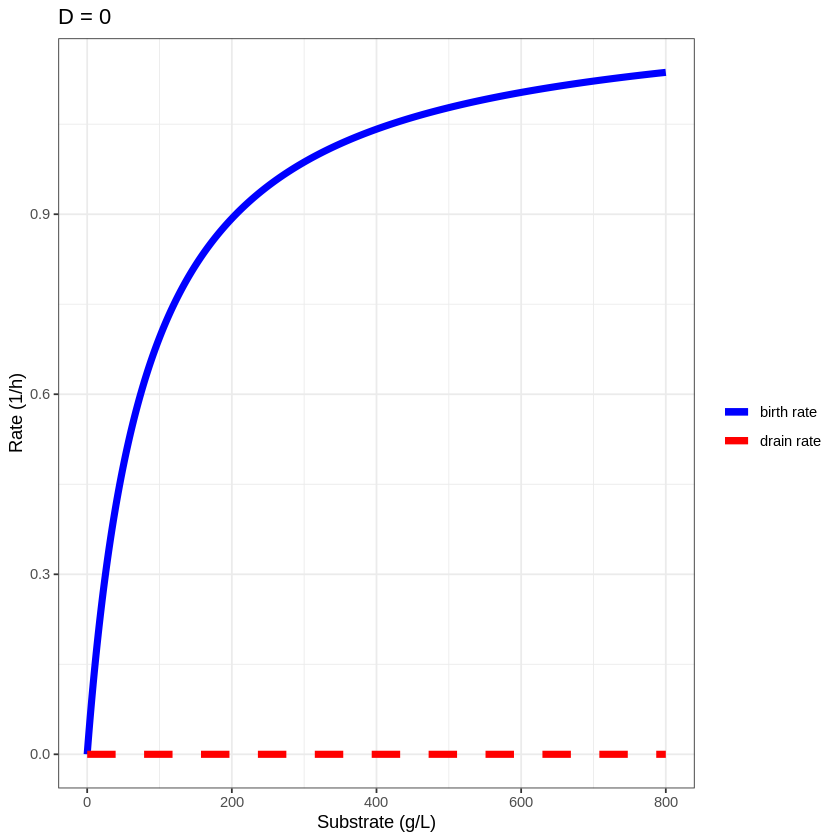

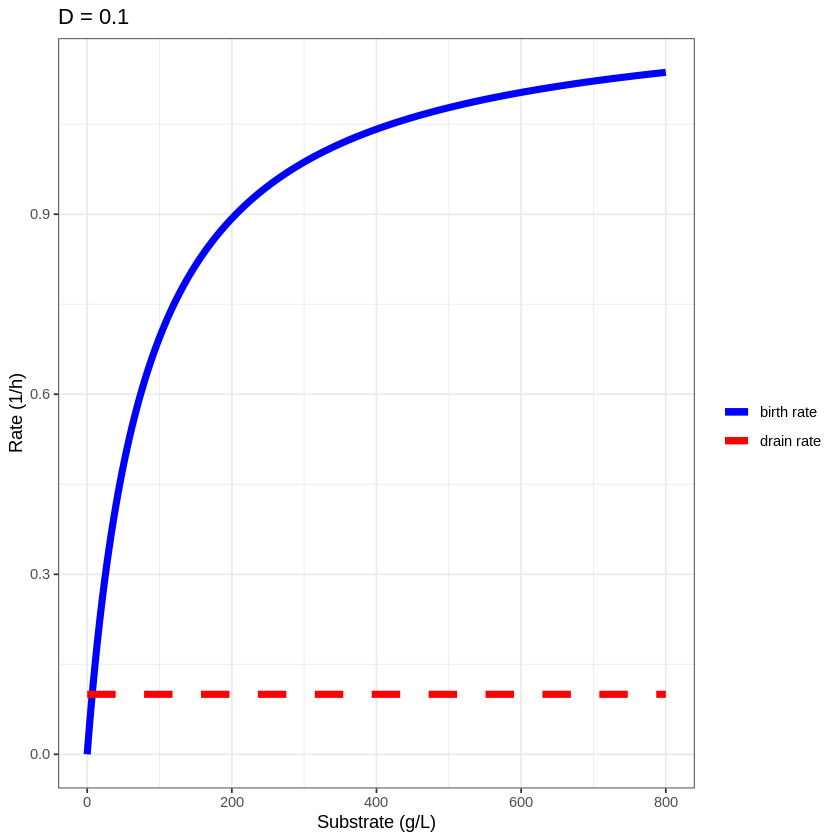

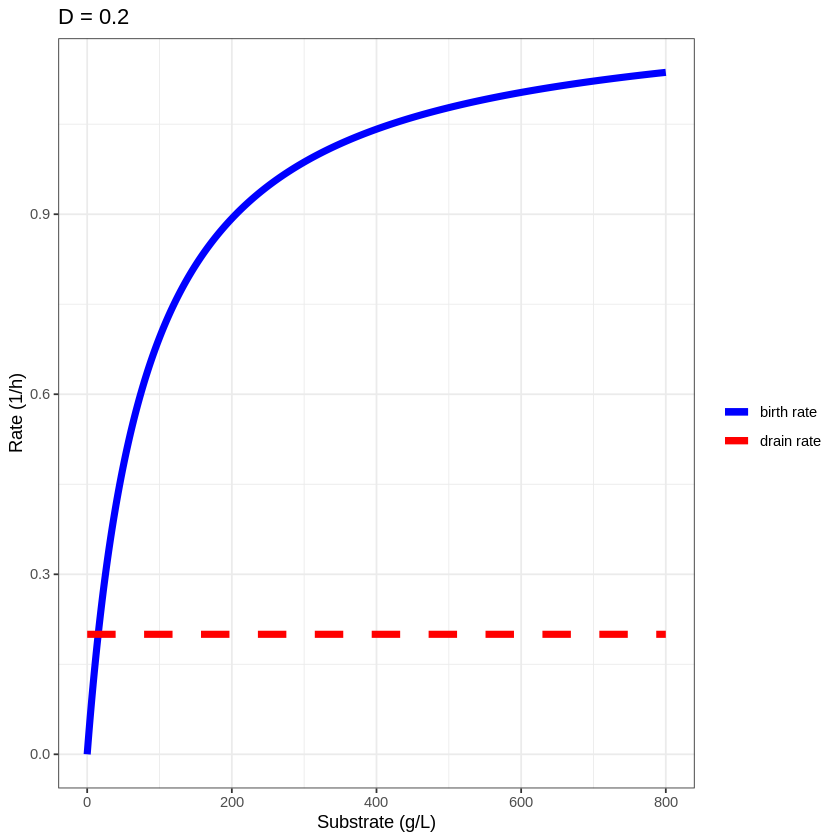

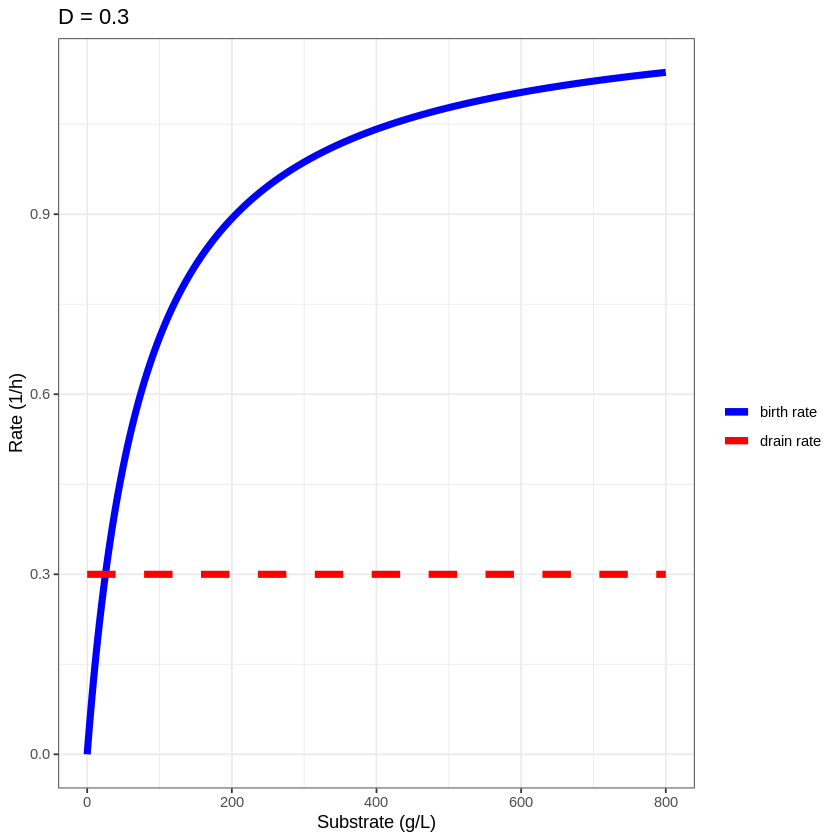

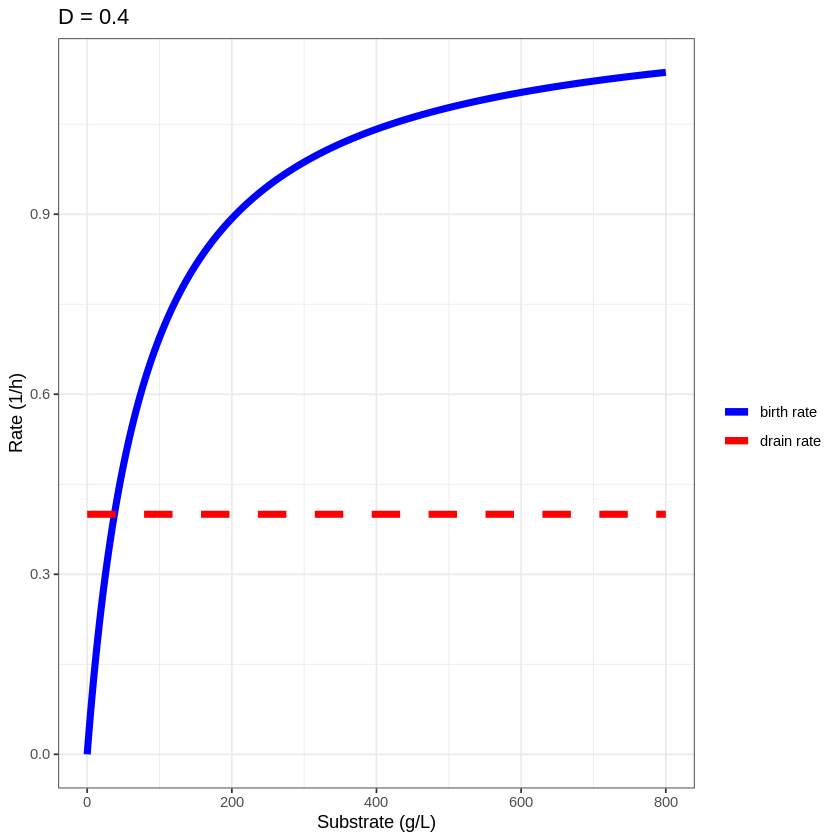

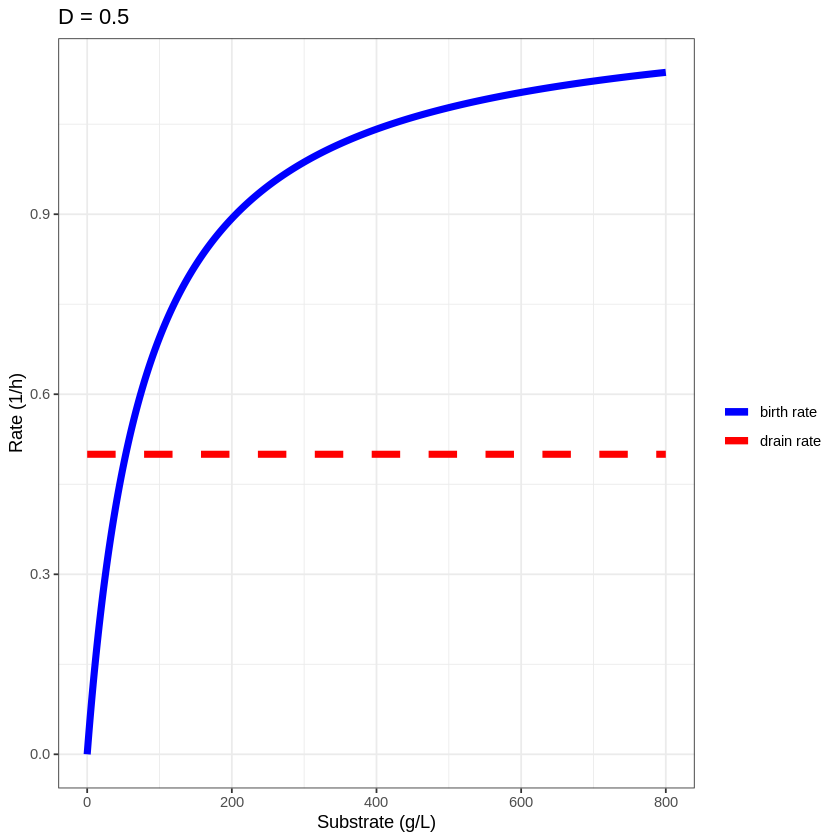

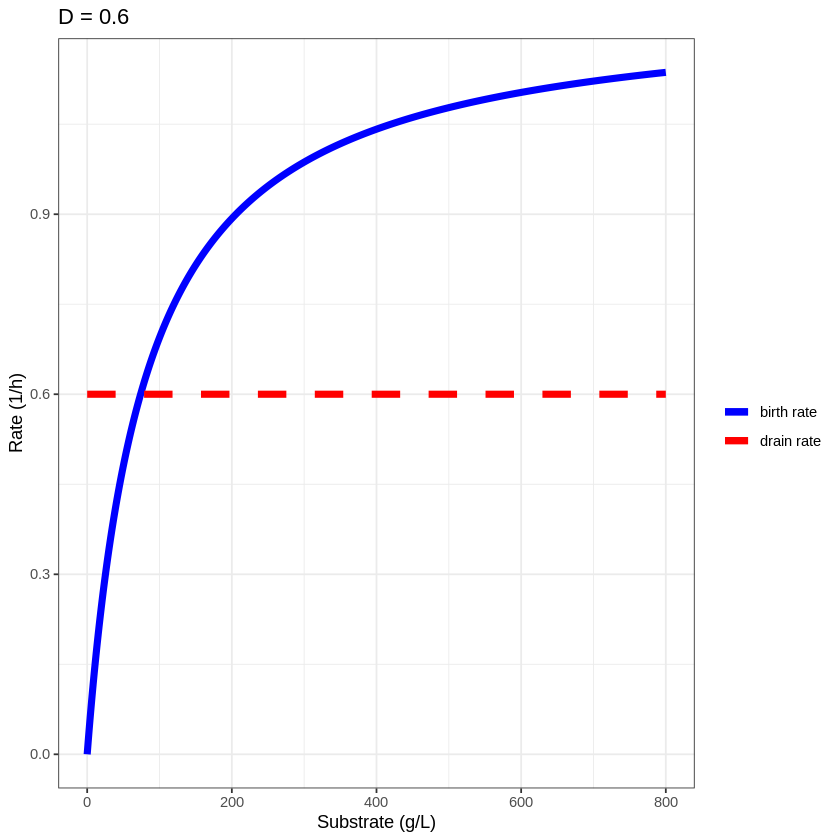

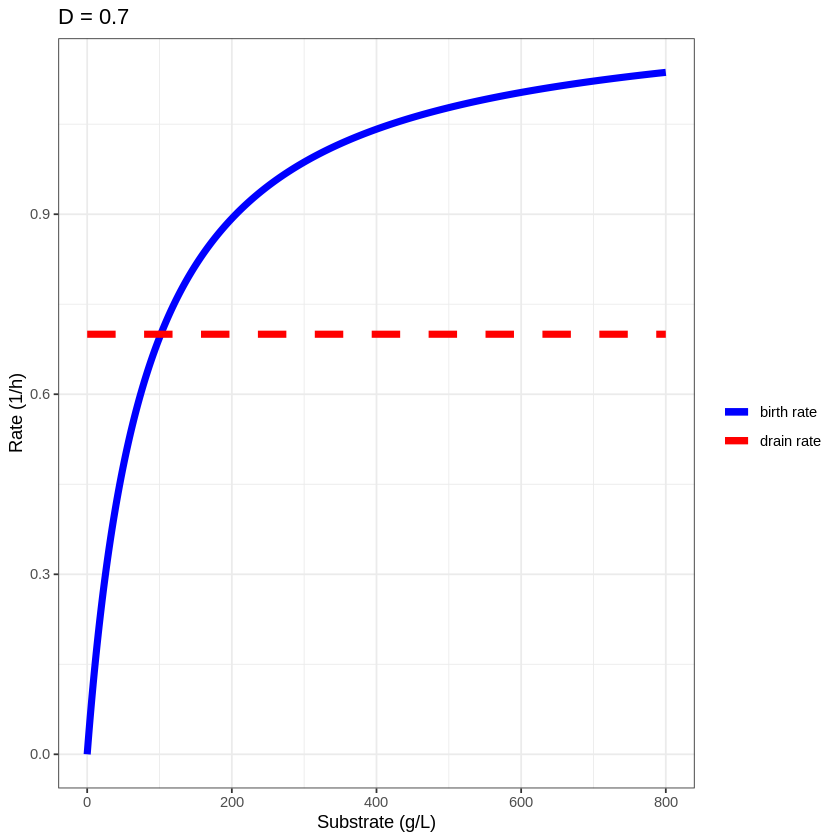

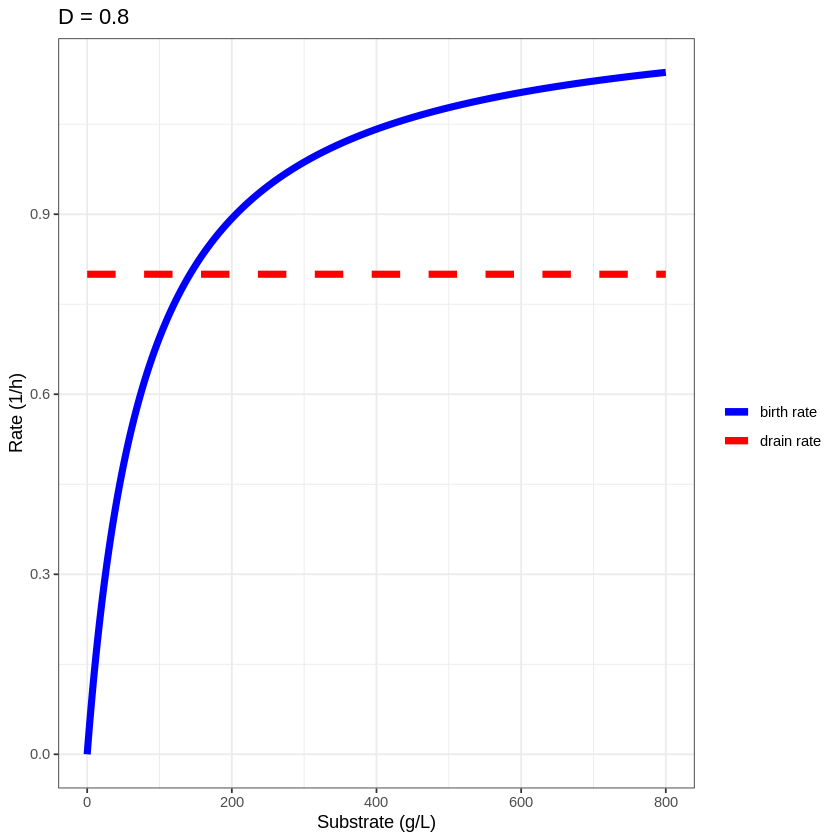

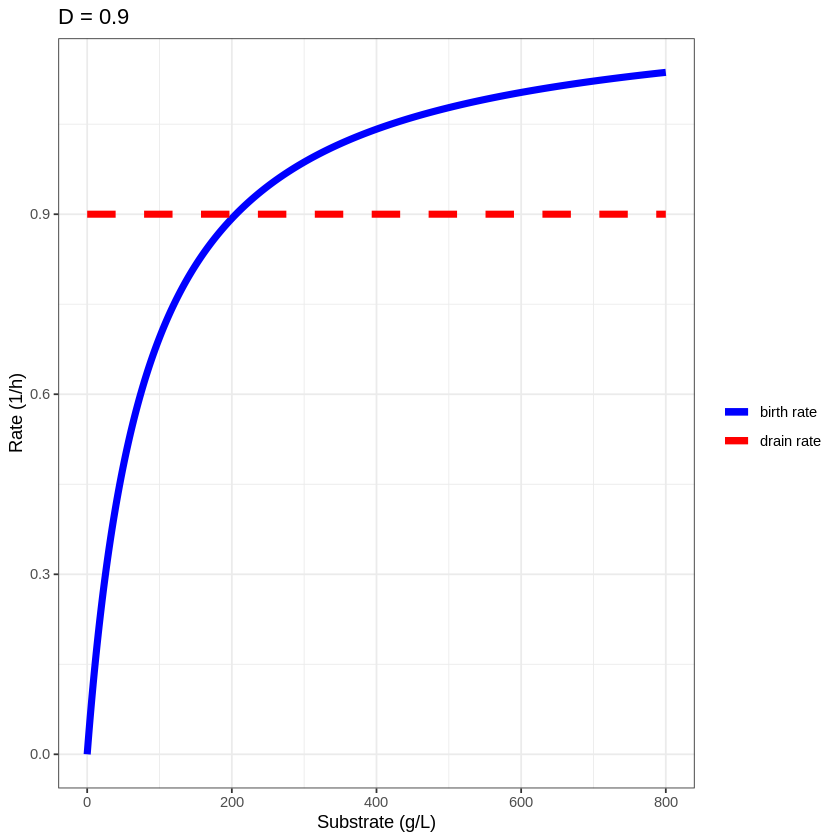

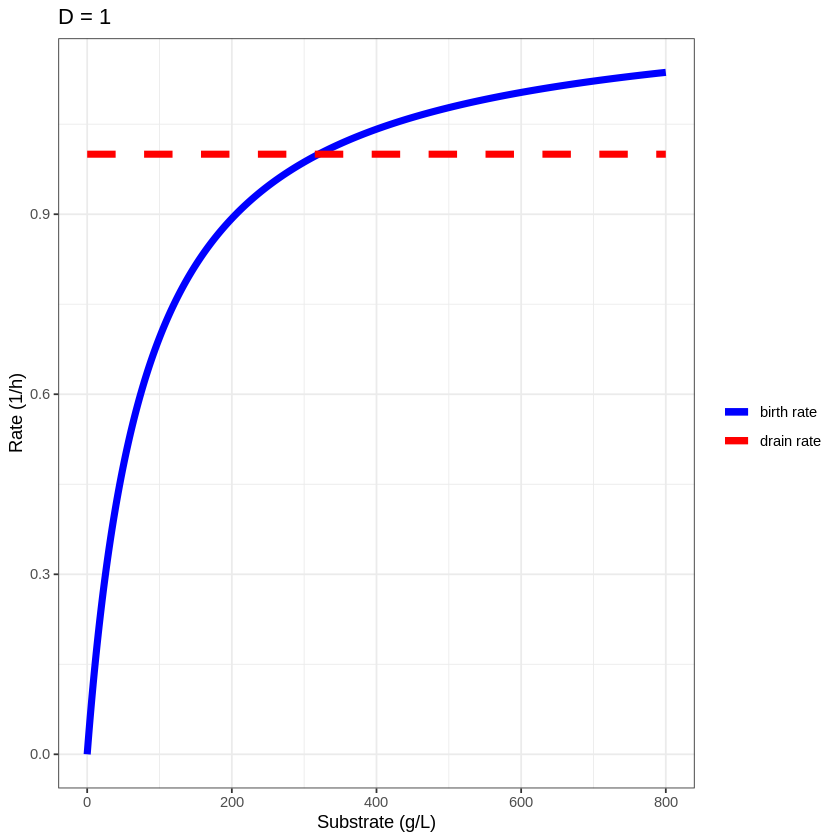

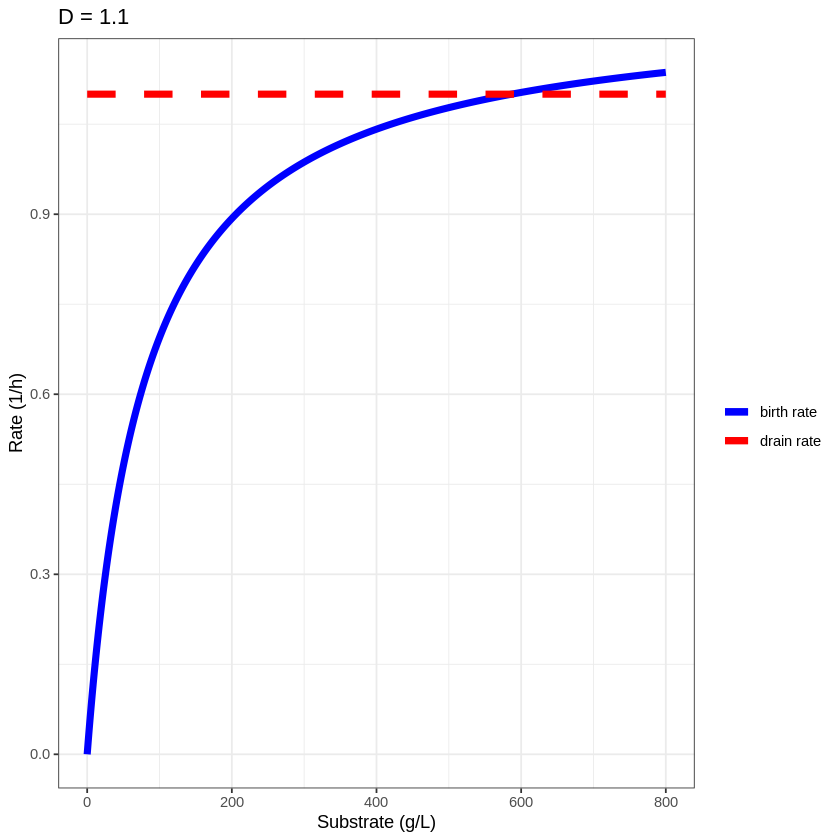

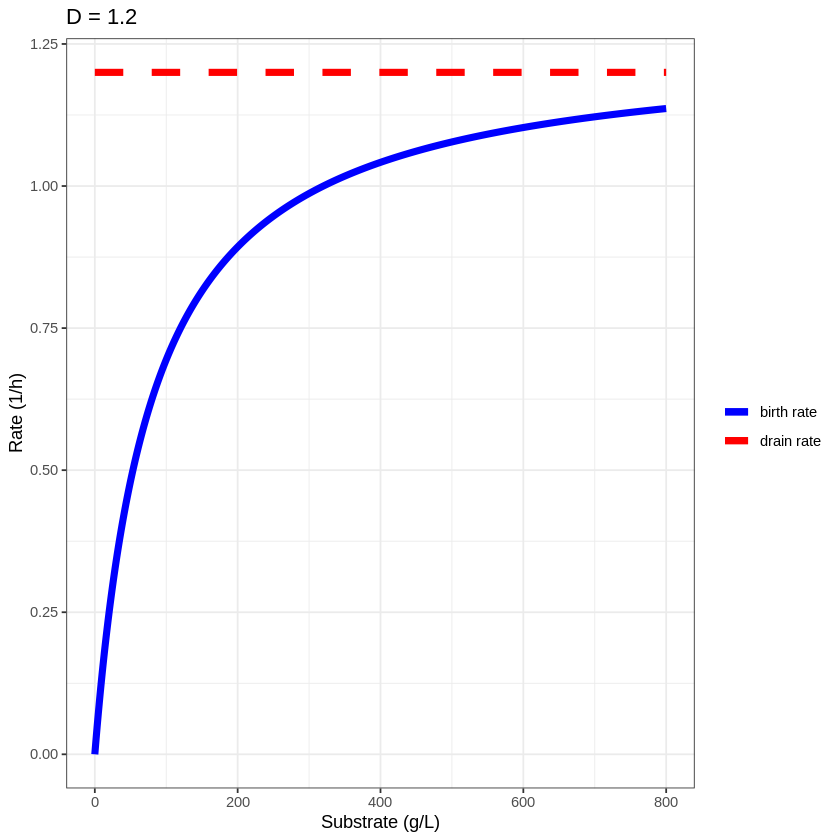

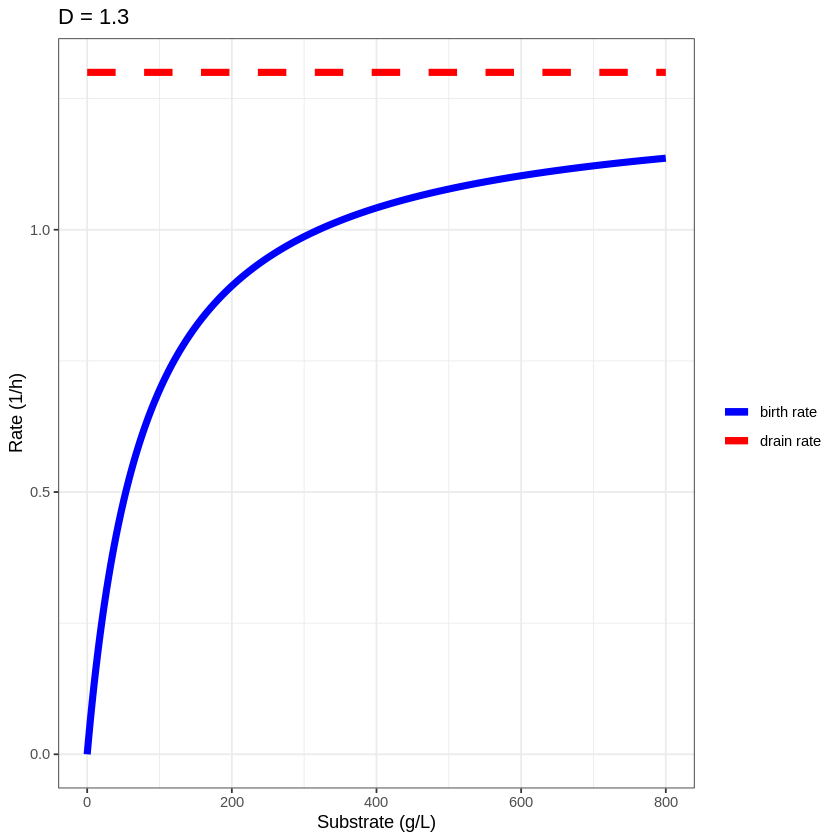

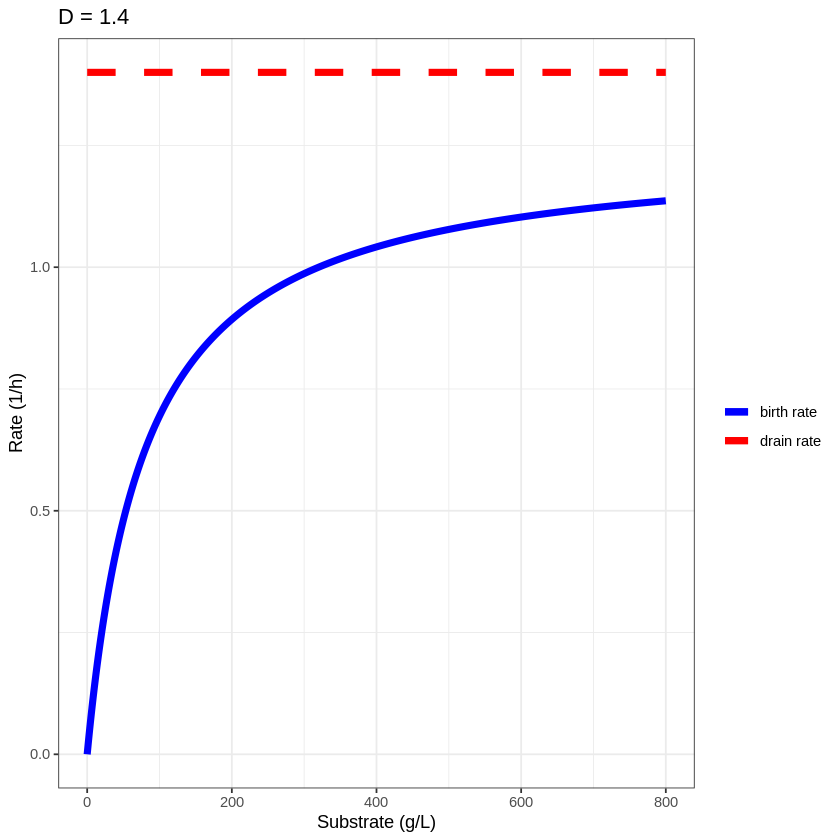

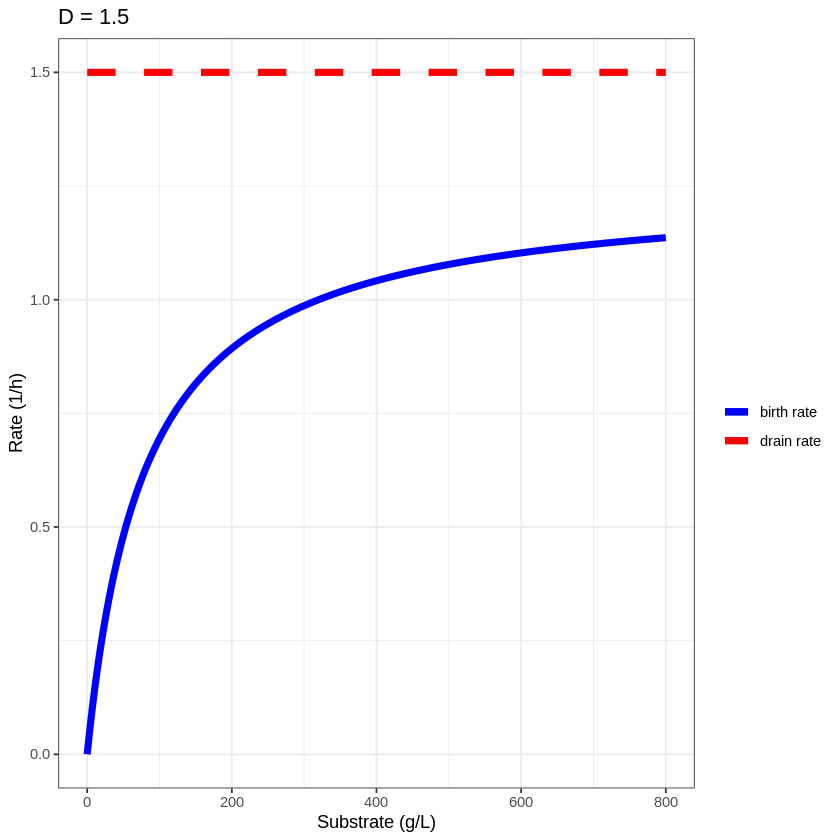

In [39]:
for (D in seq(0,1.5,0.1)) {

  data <- rates(s = s, mu = 1.25, k = 80, D = D)
  show(plot_rates(data, D))
}